In [2]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1,2],[1,4],[1,0],[4,2],[4,4],[4,0]])
X[1,1]

kmeans = KMeans(n_clusters=2).fit(X)
kmeans.labels_
kmeans.predict([[0,0],[4,0]])
kmeans.cluster_centers_

array([[1., 2.],
       [4., 2.]])

In [3]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, random_state=42)
#print(X)
#print(X[:,0])
#print(X[:,1])

pred = KMeans(n_clusters=3).fit_predict(X)

colors = np.array(['red', 'green', 'blue', 'black'])
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1], color=colors[pred])
plt.show()

<Figure size 400x400 with 1 Axes>

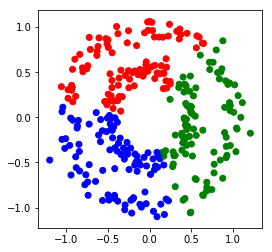

In [4]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=300, factor=.5, noise=.08)
#print(X)
#print(X[:,0])
#print(X[:,1])

pred = KMeans(n_clusters=3).fit_predict(X)

colors = np.array(['red', 'green', 'blue', 'black'])
plt.figure(figsize=(4,4))
plt.scatter(X[:,0],X[:,1], color=colors[pred])
plt.show()

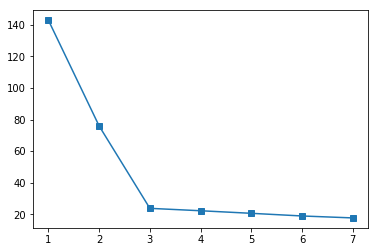

In [5]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=300, random_state=42)

inertia = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))
    
plt.plot(range(1,8), inertia, marker='s')

In [6]:
import pygame

bg_color = (255,255,255)
(width,height) = (640,480)

screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("Dataset")

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
            
    screen.fill(bg_color)
    pygame.display.flip()
    
pygame.quit()

In [7]:
import pygame

dataset = np.empty([0,2], dtype='f')

def createData(position):
    (x,y) = position
    coord = [x,y]
    global dataset
    dataset = np.append(dataset, [coord], axis=0)
    
color = (0,0,255)
radius = 2
bg_color = (255,255,255)
(width,height) = (640,480)

screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("Dataset")

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            createData(pygame.mouse.get_pos())
            
    screen.fill(bg_color)
    for data in dataset:
        pygame.draw.circle(screen, color, (int(data[0]),int(data[1])), radius, 0)
    
    pygame.display.flip()
    
pygame.quit()

In [8]:
import pygame

dataset = np.empty([0,2], dtype='f')

def createData(position):
    (x,y) = position
    r = np.random.uniform(0,R)
    phi = np.random.uniform(0,2*np.pi)
    coord = [x + r*np.cos(phi),y + r*np.sin(phi)]
    global dataset
    dataset = np.append(dataset, [coord], axis=0)

R = 30
color = (0,0,255)
radius = 2
bg_color = (255,255,255)
(width,height) = (640,480)

screen = pygame.display.set_mode((width,height))
pygame.display.set_caption("Dataset")

running = True
pushing = False
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.MOUSEBUTTONDOWN:
            pushing = True
        elif event.type == pygame.MOUSEBUTTONUP:
            pushing = False
            
    if pushing and np.random.uniform(0,1)>.7:
        createData(pygame.mouse.get_pos())
            
    screen.fill(bg_color)
    for data in dataset:
        pygame.draw.circle(screen, color, (int(data[0]),int(data[1])), radius, 0)
    
    pygame.display.flip()
    
pygame.quit()

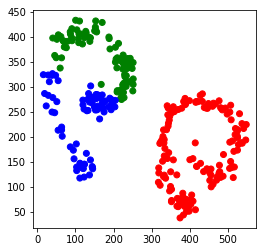

In [9]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
pred = KMeans(n_clusters=3).fit_predict(dataset)
colors = np.array(['red', 'green', 'blue', 'black'])
plt.figure(figsize=(4,4))
plt.scatter(dataset[:,0],dataset[:,1], color=colors[pred])
plt.show()

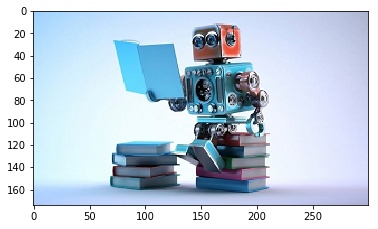

Shape: (174, 300, 4)


array([[[0.6156863 , 0.8039216 , 0.99215686, 1.        ],
        [0.61960787, 0.80784315, 0.99607843, 1.        ],
        [0.61960787, 0.80784315, 0.99607843, 1.        ],
        ...,
        [0.67058825, 0.70980394, 0.8156863 , 1.        ],
        [0.67058825, 0.70980394, 0.8156863 , 1.        ],
        [0.6627451 , 0.7019608 , 0.80784315, 1.        ]],

       [[0.62352943, 0.8117647 , 1.        , 1.        ],
        [0.62352943, 0.8117647 , 1.        , 1.        ],
        [0.627451  , 0.8156863 , 0.99215686, 1.        ],
        ...,
        [0.67058825, 0.70980394, 0.8156863 , 1.        ],
        [0.6784314 , 0.7176471 , 0.8235294 , 1.        ],
        [0.6666667 , 0.7058824 , 0.8117647 , 1.        ]],

       [[0.627451  , 0.8156863 , 1.        , 1.        ],
        [0.6313726 , 0.81960785, 1.        , 1.        ],
        [0.6313726 , 0.81960785, 1.        , 1.        ],
        ...,
        [0.6784314 , 0.7176471 , 0.8235294 , 1.        ],
        [0.6745098 , 0.713725

In [23]:
from matplotlib.image import imread, imsave

def get_image(img_path, show=True):
    orig_img = imread(img_path)
    
    if show:
        plt.imshow(orig_img)
        plt.show()
        print('Shape:', orig_img.shape)
        
    return orig_img

get_image('01.png')

In [28]:
def get_kmeans(orig_img, n_colors=8):
    X = orig_img.reshape((-1,4))
    kmeans = KMeans(n_clusters=n_colors).fit(X)
    pred = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    #print((centroids))
    
    return centroids[pred].reshape(orig_img.shape)

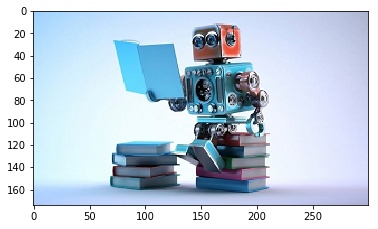

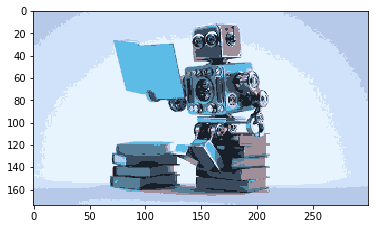

In [29]:
n_colors = 8
orig_img = get_image('01.png', show=False)
new_img = get_kmeans(orig_img, n_colors)
plt.imshow(orig_img)
plt.show()
plt.imshow(new_img)
plt.show()

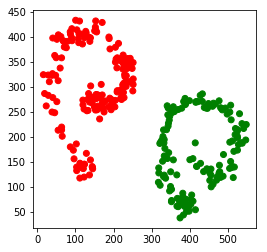

In [50]:
class K_Means():
    def __init__(self, dataset, n_clusters=3):
        self.dataset = dataset
        self.n_clusters = n_clusters
        self.max_n_iter = 100
        self.tolerance = .01
        self.fitted = False
        self.labels = np.array([])
        self.centroids = np.array([self.dataset[k] for k in range(self.n_clusters)], dtype='f')
        #print(self.centroids)
        
    def get_dist2(self, list1, list2):
        return sum((i-j)**2 for i,j in zip(list1,list2))
    
    def distribute_data(self):
        self.labels = np.array([])
        for elem in self.dataset:
            dist = [self.get_dist2(elem, center) for center in self.centroids]
            indx = dist.index(min(dist))
            self.labels = np.append(list(self.labels), indx).astype(int)
        #print(self.labels)
        
    def recalculate_centroids(self):
        for i in range(self.n_clusters):
            num = 0
            temp = np.zeros(self.dataset[0].shape)
            for k, label in enumerate(self.labels):
                if label == i:
                    temp = temp + self.dataset[k]
                    num += 1
            self.centroids[i] = temp/num
        #print(self.centroids)
        
    def fit(self):
        iter = 1
        while iter < self.max_n_iter:
            prev_centroids = np.copy(self.centroids)
            self.distribute_data()
            self.recalculate_centroids()
            if max([self.get_dist2(i,k) for i,k in zip(self.centroids, prev_centroids)]) < self.tolerance:
                break
            iter += 1
        self.fitted = True
        
test = K_Means(dataset, 2)
test.get_dist2(dataset[177],dataset[46])
test.distribute_data()
test.recalculate_centroids()
test.fit()


colors = np.array(['red', 'green', 'blue', 'black'])
pred = test.labels

plt.figure(figsize=(4,4))
plt.scatter(dataset[:,0],dataset[:,1], color=colors[pred])
plt.show()